# Human Activity Recognition

In [1]:
# import the standard libraries
import pandas as pd #Data processing and I/O operation
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt

%matplotlib inline

#Import the machine libraries
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Import the Dataset


In [3]:
train = pd.read_csv(r"C:\Users\mypc\Desktop\data science1\human activity recognition\train.csv")
test = pd.read_csv(r"C:\Users\mypc\Desktop\data science1\human activity recognition\test.csv")


In [4]:
train.head(10)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [5]:
train.tail(1)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7351,0.351503,-0.012423,-0.203867,-0.26927,-0.087212,0.177404,-0.377404,-0.038678,0.22943,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [6]:
train.shape


(7352, 563)

In [7]:
test.shape


(2947, 563)

# Check for missing values


In [8]:
print('Any missing value in training set:', train.isnull().values.any())
print('Any missing value in training set:', test.isnull().values.any())


Any missing value in training set: False
Any missing value in training set: False


# Exploring the Dataset


In [9]:
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


# Exploratory Data Analysis


In [10]:
temp = train['Activity'].value_counts()
temp


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [11]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})


In [12]:
df.head(2)


,labels,values
0,LAYING,1407
1,STANDING,1374


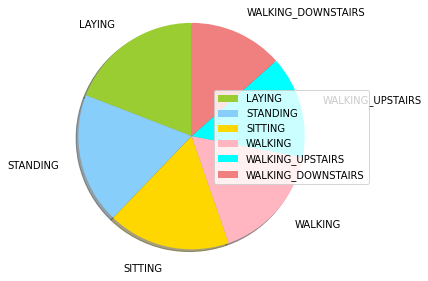

In [13]:
labels=df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Data Processing


In [14]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [15]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train_label)
y_train = encoder.transform(Y_train_label)

In [16]:
y_train

array([2, 2, 2, ..., 5, 5, 5])

In [17]:
encoder.fit(Y_test_label)
y_test = encoder.transform(Y_test_label)

In [18]:
y_test

array([2, 2, 2, ..., 5, 5, 5])

In [19]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

# Model Building for Human Acitivity Recognition


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [21]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [22]:
y_pred = knn.predict(x_test)


In [23]:
print((accuracy_score(y_test, y_pred)*100), '%')


89.98982015609094 %


In [ ]:
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))


In [ ]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [ ]:
scores = np.array(scores)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()*100),'%')

# Conclusion

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))


In [ ]:
y_pred_label

In [ ]:
print(confusion_matrix(Y_test_label, y_pred_label))


In [ ]:
print(classification_report(Y_test_label, y_pred_label))
